<a href="https://colab.research.google.com/github/Sarthak1408/HealthLensPro/blob/main/EarlyDiseaseDetectionUsingNailImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
IMAGE_SIZE = [224,224]

train_path ='C:/Users/sumit/dataset/train'
valid_path = 'C:/Users/sumit/dataset/test'


In [ ]:
# Add preprocessing layer to the front of VGG16
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# For not training existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('C:/Users/sumit/dataset/train/*')
len(folders)

17

In [ ]:
x = Flatten ()(vgg.output)
x = Dense (1000, activation='relu') (x)
prediction = Dense (len (folders), activation='softmax') (x)

# Create a model object
model= Model(inputs=vgg.input, outputs=prediction)

#view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers

In [ ]:
# Tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy', optimizer=optimizers. Adam(learning_rate=0.001), metrics=['accuracy'])
train_datagen = ImageDataGenerator (rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator (rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('C:/Users/sumit/dataset/train',
                                                  target_size = (224,224),
                                                  batch_size = 16,
                                                  class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/sumit/dataset/test',
                                                  target_size = (224,224),
                                                  batch_size = 16,
                                                  class_mode='categorical')

Found 647 images belonging to 17 classes.
Found 183 images belonging to 17 classes.


In [ ]:
clas = test_set.classes
print(clas)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10
 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 14 15 15 15 15 15 15 16 16 16 16 16 16 16 16]


In [ ]:
r = model.fit(training_set, validation_data = test_set,
              epochs = 20,
              steps_per_epoch = len(training_set),
              validation_steps = len(test_set))

Epoch 1/20
41/41 [==============================] - 142s 3s/step - loss: 6.2061 - accuracy: 0.0958 - val_loss: 2.9509 - val_accuracy: 0.1749
Epoch 2/20
41/41 [==============================] - 131s 3s/step - loss: 2.7084 - accuracy: 0.1839 - val_loss: 2.7382 - val_accuracy: 0.1967
Epoch 3/20
41/41 [==============================] - 152s 4s/step - loss: 2.4093 - accuracy: 0.2736 - val_loss: 2.2669 - val_accuracy: 0.2842
Epoch 4/20
41/41 [==============================] - 153s 4s/step - loss: 2.2943 - accuracy: 0.3014 - val_loss: 1.9899 - val_accuracy: 0.4536
Epoch 5/20
41/41 [==============================] - 151s 4s/step - loss: 2.0910 - accuracy: 0.3632 - val_loss: 1.8256 - val_accuracy: 0.4262
Epoch 6/20
41/41 [==============================] - 149s 4s/step - loss: 1.8873 - accuracy: 0.4560 - val_loss: 1.7006 - val_accuracy: 0.5792
Epoch 7/20
41/41 [==============================] - 151s 4s/step - loss: 1.7781 - accuracy: 0.4606 - val_loss: 1.7256 - val_accuracy: 0.4809
Epoch 8/20
41

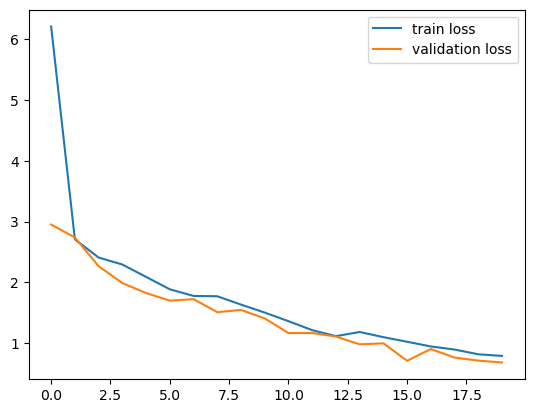

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculate the Loss in Graph
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history [ 'val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.jpg')

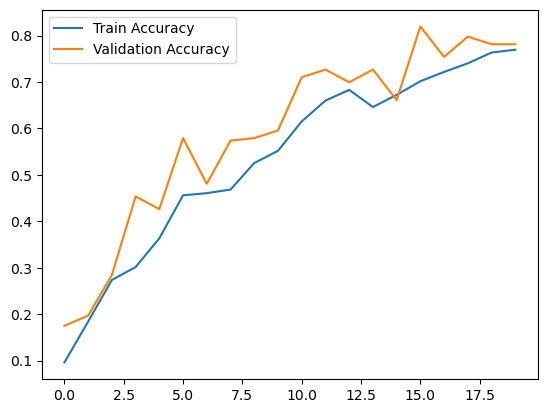

<Figure size 640x480 with 0 Axes>

In [ ]:

# Accuracies curve in Graphs
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.save('HLP_EarlyStageDiseaseDetection.h5')
print("Model is saved here ==> ",os.getcwd())

Model is saved here ==>  C:\Users\sumit


In [ ]:
import cv2

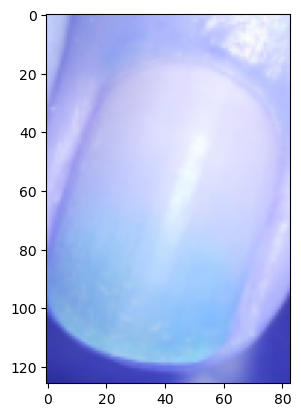

In [ ]:
img = cv2.imread("C:/Users/sumit/dataset/train/yellow nails/13.PNG")
img = img/255
plt.imshow(img)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'C:/Users/sumit/dataset/train',
    validation_split= 0.2 , seed = 123,
    subset = "training"
)

Found 647 files belonging to 17 classes.
Using 518 files for training.


TESTING

In [ ]:
path = 'C:/Users/sumit/dataset/test/eczema/21.PNG'

1/1 [==============================] - 0s 133ms/step
eczema


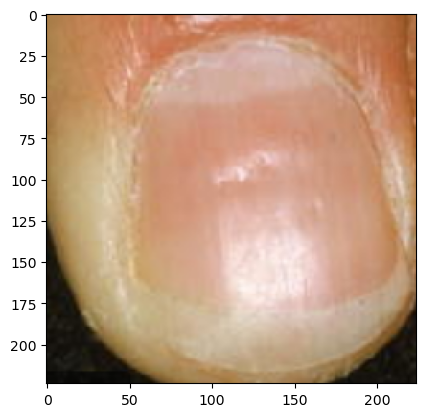

In [ ]:
from keras.preprocessing import image
from keras.utils import load_img
img = load_img (path, target_size=(224,224))
img= np.asarray(img)
plt.imshow(img)
img= np.expand_dims(img, axis=0)
output = model.predict(img)
cls = train_ds.class_names
output = cls [np.argmax (output)]
print(output)

In [ ]:
output = np.argmax(output)
print(output)

0


In [ ]:
# cls = train_ds.class_names
# cls[np.argmax(output)]